In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.impute import KNNImputer
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
!pip install --upgrade jinja2
!pip install --upgrade pandas seaborn matplotlib

/Users/lize/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/lize/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [3]:
data = pd.read_csv("/Users/Lize/Desktop/key_assets.csv")
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Do not wrap rows
pd.set_option('display.max_colwidth', None)  # Show full content of columns

data.head()

RESOURCE_TYPE                                                         FULL_TABLE_ID     PROJECT_NAME                    DATASET_NAME             TABLE_NAME TABLE_TYPE IMPORTANCE  IMPORTANCE_SCORE IS_KEY_ASSET_MARKED_BY_CLIENT  PRC_ACTIVE_DAYS  USERS  READ_USERS                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [4]:
data["IMPORTANCE"].value_counts()

IMPORTANCE
high      955
low       591
medium    257
Name: count, dtype: int64

count    1803.000000
mean        0.480910
std         0.372942
min         0.000000
25%         0.000000
50%         0.640000
75%         0.820000
max         0.990000
Name: IMPORTANCE_SCORE, dtype: float64


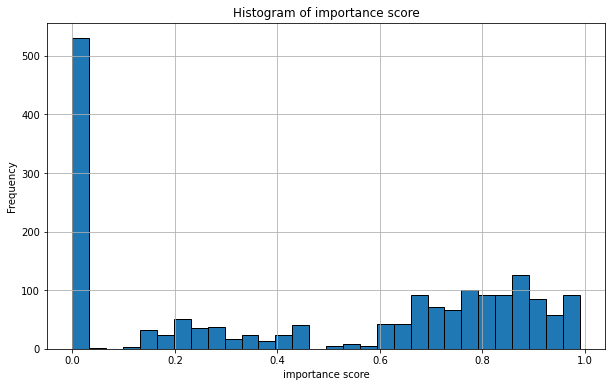

In [5]:
print(data["IMPORTANCE_SCORE"].describe())

plt.figure(figsize=(10, 6))  
plt.hist(data["IMPORTANCE_SCORE"], bins=30, edgecolor='black')  
plt.title('Histogram of importance score')  
plt.xlabel("importance score")  
plt.ylabel('Frequency')  
plt.grid(True)  
plt.show()  

In [6]:
print(len(data[data["IMPORTANCE_SCORE"] >= 0.6]))
print(len(data[(data["IMPORTANCE_SCORE"] < 0.6) & (data["IMPORTANCE_SCORE"] >= 0.2)]))
print(len(data[data["IMPORTANCE_SCORE"] < 0.2]))

955
257
591


### Categorical Vars

In [23]:
# Bar chart
def plot_pie_chart(dataframe, column_name):
    """
    Plot a pie chart for the value counts of a specified column in a DataFrame.

    :param dataframe: pandas DataFrame containing the data.
    :param column_name: String name of the column to plot.
    """
    purpose_counts = dataframe[column_name].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(purpose_counts.values, labels=purpose_counts.index, autopct='%1.1f%%')
    plt.title(f"{column_name} Distribution")
    plt.gcf().set_facecolor('white')
    plt.show()

In [7]:
print(data["IS_KEY_ASSET_MARKED_BY_CLIENT"].value_counts())
print()
print(data["PERIODICITY"].value_counts())
print()
print(data["DOMAINS"].value_counts())
print()
print(data["HAS_DESCRIPTION"].value_counts())
print()
print(data["IS_KEY_SOURCE_NODE"].value_counts())
print()
print(data["IS_KEY_HUB_NODE"].value_counts())
print()
print(data["IS_KEY_ANALYTICAL_NODE"].value_counts())

IS_KEY_ASSET_MARKED_BY_CLIENT
True     2
False    1
Name: count, dtype: int64

PERIODICITY
24 Hour         303
1 Hour          144
non-periodic     65
6 Hour           23
3 Hour           15
12 Hour          10
Name: count, dtype: int64

DOMAINS
EDM Data Analytics Engineering, Editor                                     982
EDM Data Platform Engineering, Editor                                      266
Editor                                                                     205
EDM Data Platform Engineering, Editor, RAW_HVR_SUPPORT                     163
EDM Data Analytics Engineering, Editor, Marketing                           48
EDM Data Analytics Engineering, Editor, Sales and Customer Service          36
EDM Data Platform Engineering                                               19
EDM Data Platform Engineering, Editor, RAW_ADOBE                            18
Editor, Marketing                                                           17
EDM Data Platform Engineering, Editor, RAW_

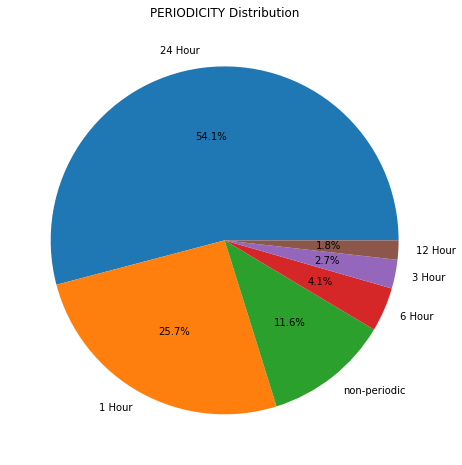

In [24]:
plot_pie_chart(data, 'PERIODICITY')

### Numerical Vars

In [8]:
# Create a uniformly colored summary statistics table without comparison
def style_summary_table_uniform_color(summary_df):
    return summary_df.style\
                     .format("{:.2f}", na_rep="N/A")\
                     .set_properties(**{
                         'text-align': 'right',
                         'font-size': '10pt',
                         'background-color': 'white'  # light grey background for my own preference
                     })\
                     .set_table_styles([dict(selector='th', props=[('text-align', 'left')])])\
                     .set_caption("Uniformly Colored Summary Statistics for All Attributes")

In [9]:
# Correlation matrix
def plot_correlation_matrix(dataframe):
    """
    Plot the correlation matrix for a given DataFrame.
    :param dataframe: pandas DataFrame for which to plot the correlation matrix
    """
    numeric_df = dataframe.select_dtypes(include=['number'])
    plt.figure(figsize=(15, 12))
    correlation_matrix = numeric_df.corr()  # Compute the correlation matrix
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

In [10]:
def plot_pairplot(dataframe):
    """
    Plot a pair plot for the specified subset of variables or for all variables if no subset is specified.

    :param dataframe: pandas DataFrame containing the data.
    :param subset: List of string names of the columns to include in the pair plot. If None, all variables are used.
    """
    numeric_df = dataframe.select_dtypes(include=['number'])
    sns.pairplot(numeric_df)
    plt.show()

In [17]:
# Histogram
def plot_histograms(dataframe, bins=15, figsize=(15, 12)):
    """
    Plot histograms for all numerical columns in a DataFrame.

    :param dataframe: pandas DataFrame containing the data.
    :param bins: Number of bins for the histogram (default is 15).
    :param figsize: Tuple of figure size (default is (15, 12)).
    """
    num_numerical_cols = len(dataframe.select_dtypes(include=np.number).columns)
    grid_size = int(np.ceil(np.sqrt(num_numerical_cols)))
    dataframe.hist(bins=bins, figsize=figsize, layout=(grid_size, grid_size))
    plt.tight_layout()
    plt.show()

In [19]:
# Box Plot
def plot_boxplots(dataframe, figsize=(15, 12)):
    """
    Plot box plots for all numerical columns in a DataFrame.

    :param dataframe: pandas DataFrame containing the data.
    :param figsize: Tuple of figure size (default is (15, 10)).
    """
    num_numerical_cols = len(dataframe.select_dtypes(include=np.number).columns)
    grid_size = int(np.ceil(np.sqrt(num_numerical_cols)))
    fig, axes = plt.subplots(grid_size, grid_size, figsize=figsize)
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    axes_flat = axes.flatten()

    for i, column_name in enumerate(dataframe.select_dtypes(include=np.number).columns):
        dataframe.boxplot(column=[column_name], ax=axes_flat[i])
    # Remove any unused axes
    for i in range(num_numerical_cols, len(axes_flat)):
        fig.delaxes(axes_flat[i])

    plt.tight_layout()
    plt.show()

In [11]:
summary_df = data.describe()

styled_summary_stats_uniform_color = style_summary_table_uniform_color(summary_df)
styled_summary_stats_uniform_color

,IMPORTANCE_SCORE,PRC_ACTIVE_DAYS,USERS,READ_USERS,WRITE_USERS,READS,DISTINCT_READS,PRC_DISTINCT_READS,AVG_READS_PER_ACTIVE_DAY,WRITES,DISTINCT_WRITES,PRC_DISTINCT_WRITES,AVG_WRITES_PER_ACTIVE_DAY,DAYS_SINCE_LAST_READ,DAYS_SINCE_LAST_WRITE,DIRECT_UPSTREAM_TABLES,DIRECT_DOWNSTREAM_TABLES,TOTAL_ROWS,TOTAL_BYTES,ROWS_PER_DAY,BYTES_PER_DAY
count,1803.00,1803.00,1446.00,1446.00,1446.00,1803.00,1803.00,1621.00,1483.00,1803.00,1803.00,1086.00,1483.00,1384.00,891.00,1803.00,1803.00,589.00,589.00,551.00,0.00
mean,0.48,65.12,8.36,8.27,0.33,7668.40,2021.16,52.14,314.05,4917.61,346.41,47.46,201.36,2.24,1.82,1.73,2.44,1840332302.42,82284143450.84,1921746.97,N/A
std,0.37,41.74,41.85,41.86,0.48,45422.43,10219.84,42.02,1664.94,103228.99,3330.81,43.41,3793.72,6.06,4.28,4.11,4.93,22023566469.51,759281739196.28,18934719.39,N/A
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-19843639.00,N/A
25%,0.00,13.33,1.00,1.00,0.00,1.50,1.00,5.70,1.67,0.00,0.00,2.08,0.00,0.00,0.00,0.00,1.00,23733.00,983040.00,17.00,N/A
50%,0.64,93.33,1.00,1.00,0.00,69.00,5.00,50.90,9.54,1.00,1.00,36.59,0.71,0.00,0.00,1.00,1.00,1677604.00,60990464.00,1287.00,N/A
75%,0.82,100.00,3.00,3.00,1.00,1275.00,167.00,100.00,65.11,56.00,1.00,100.00,3.43,1.00,1.00,1.00,3.00,51026381.00,2678155776.00,57089.00,N/A
max,0.99,100.00,638.00,638.00,2.00,889316.00,183985.00,110.00,29643.87,4241064.00,74257.00,100.00,141368.80,30.00,30.00,74.00,127.00,422346993534.00,11851833965568.00,369716424.00,N/A


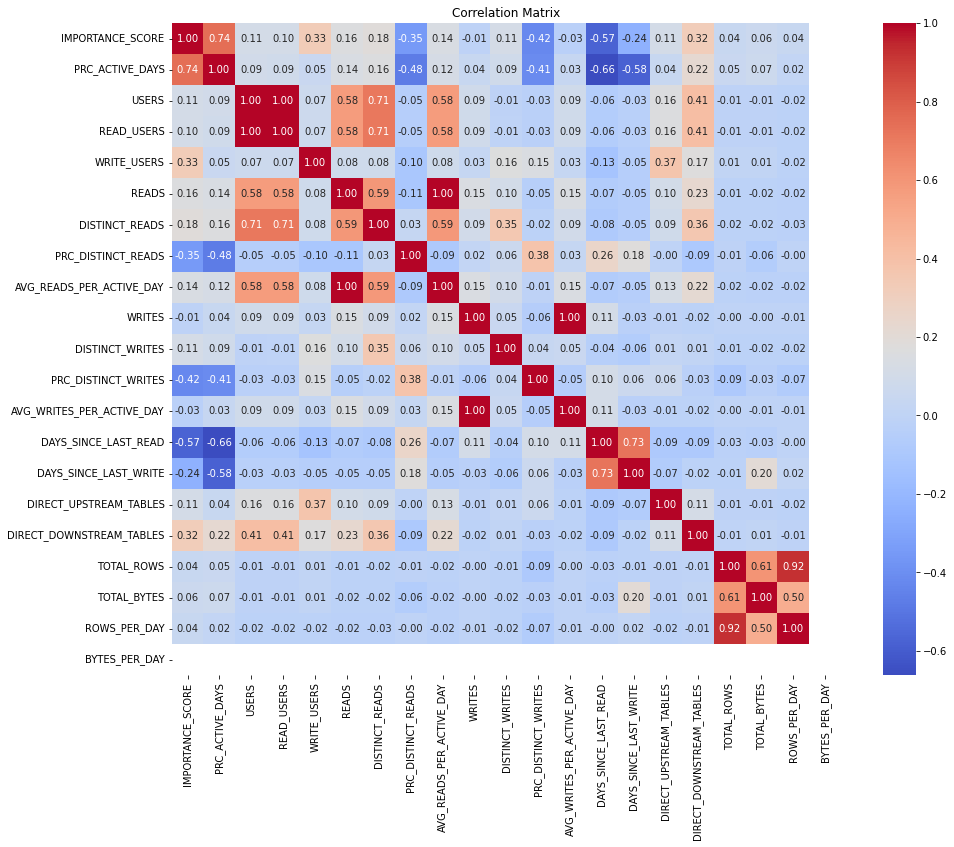

In [12]:
plot_correlation_matrix(data)

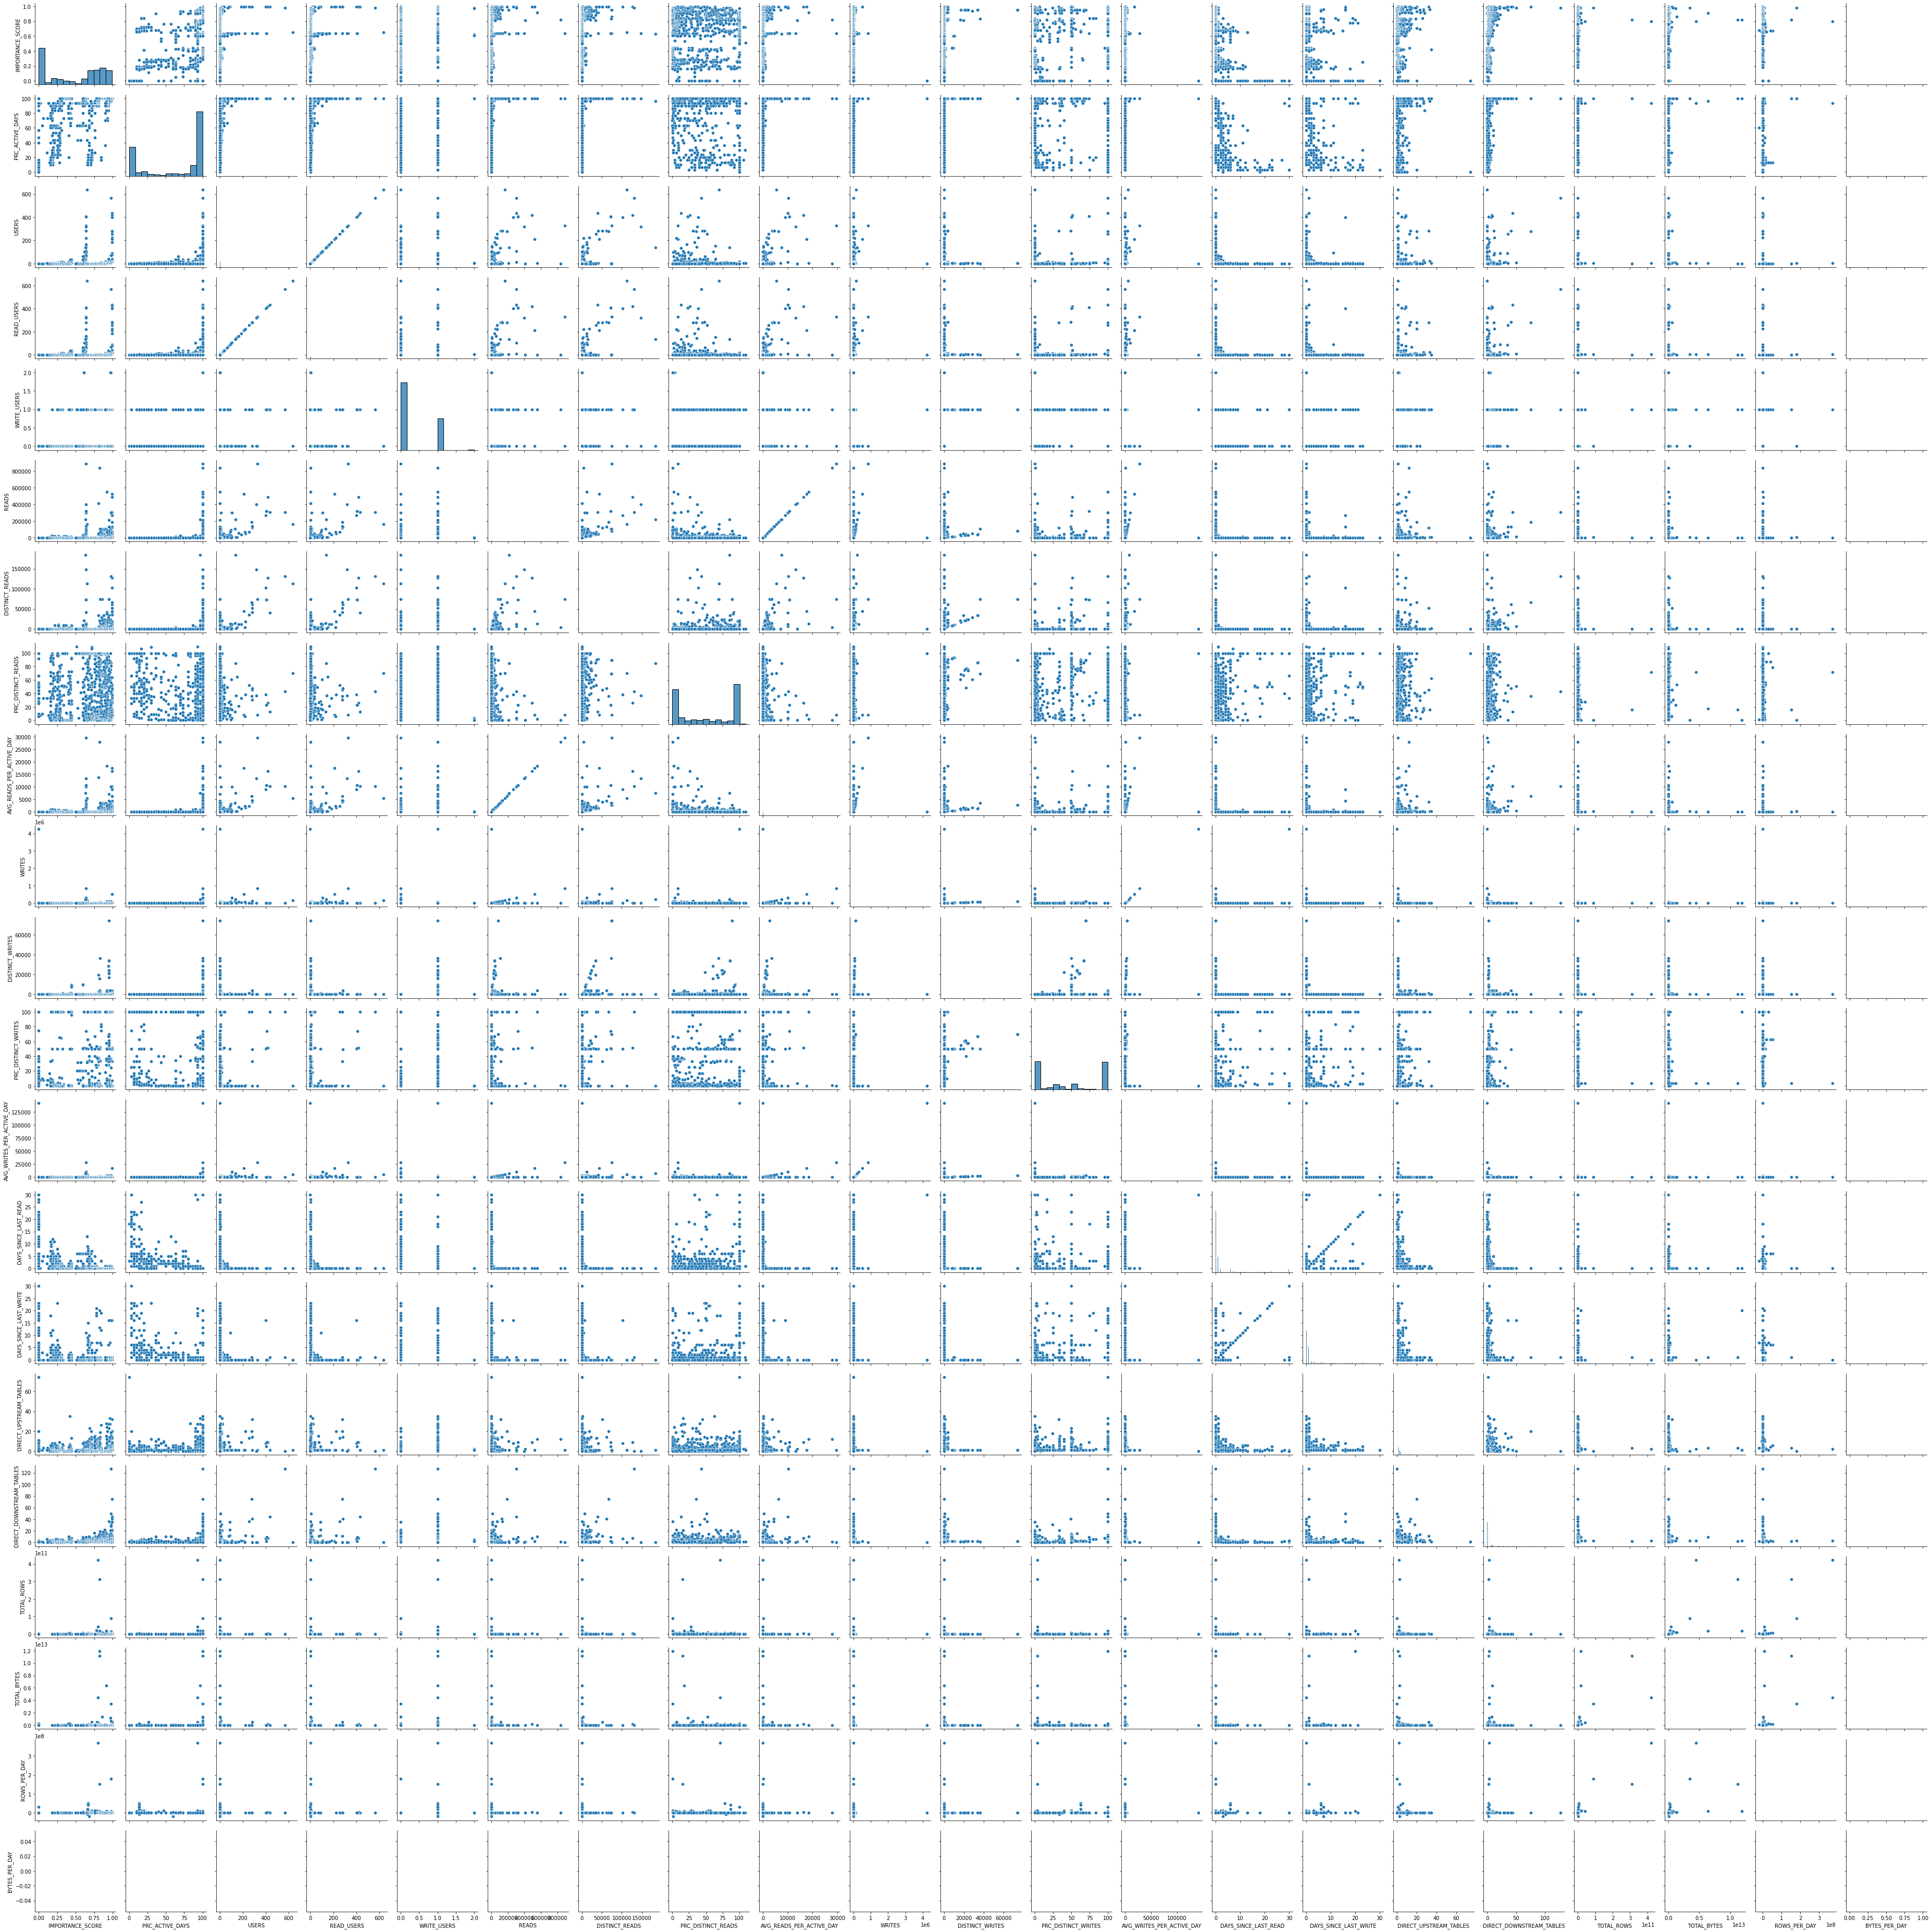

In [13]:
plot_pairplot(data)

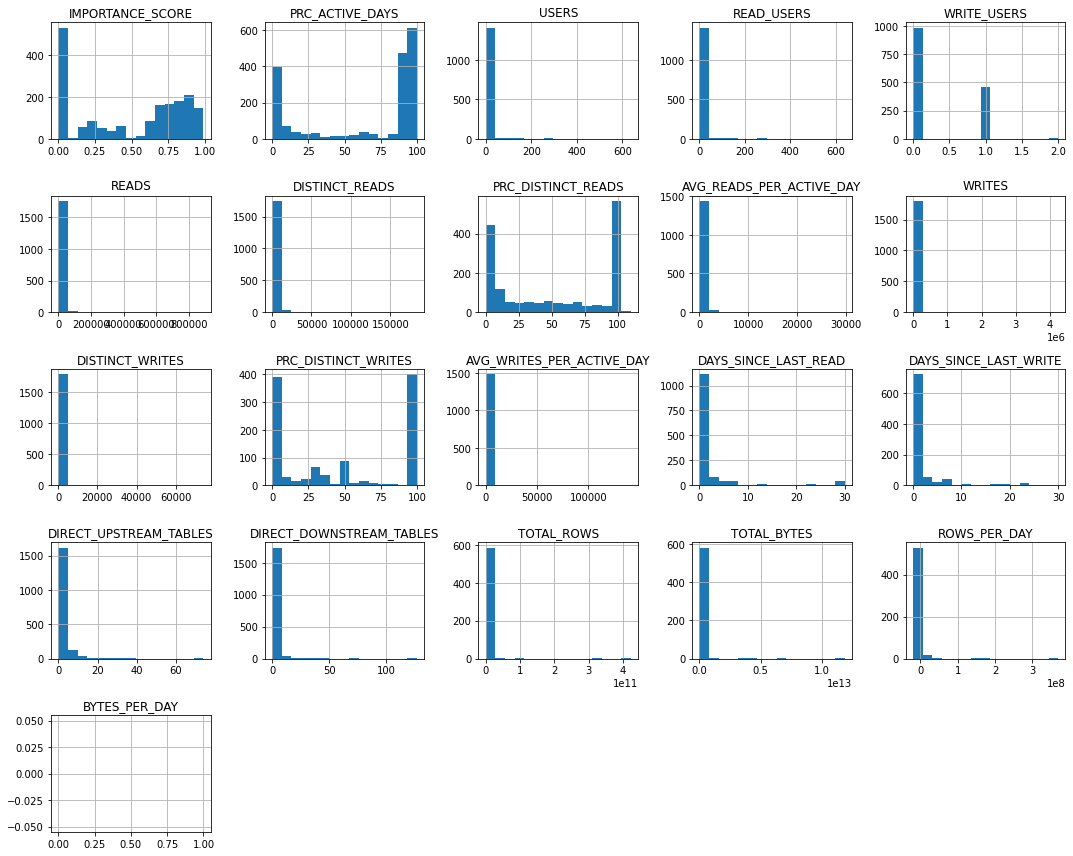

In [18]:
plot_histograms(data)

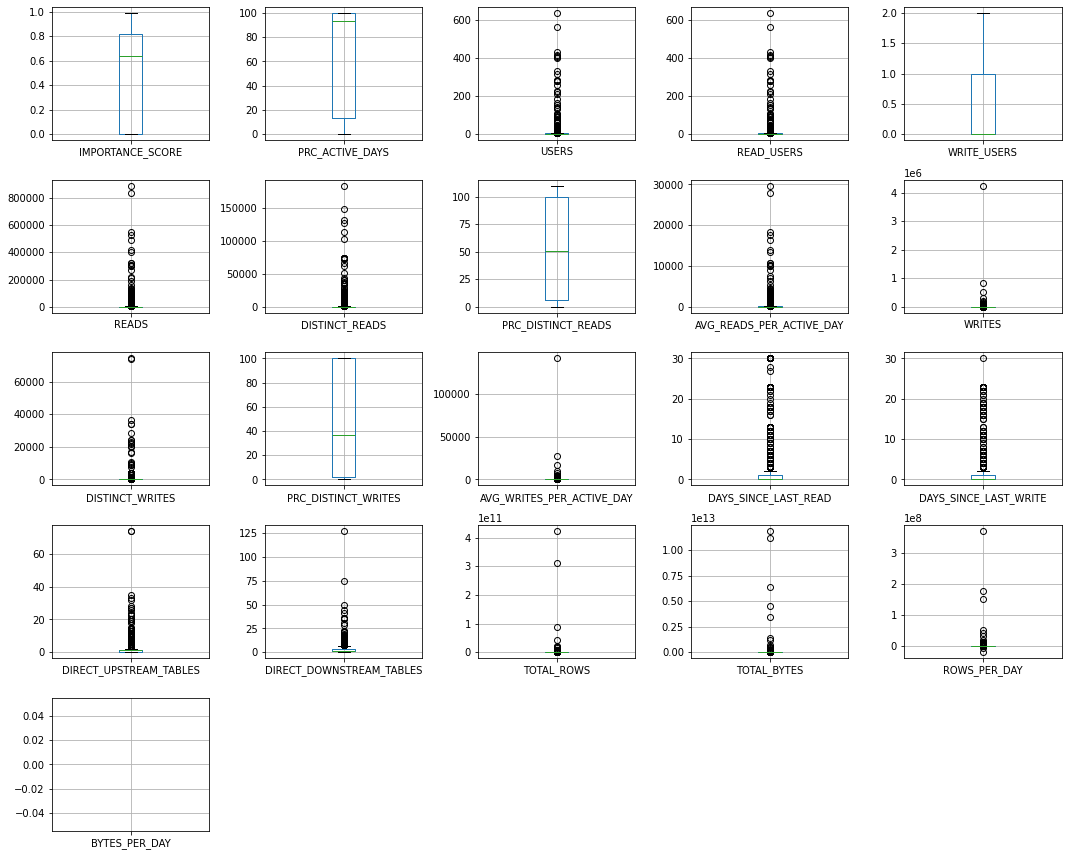

In [20]:
plot_boxplots(data)

count    1803.000000
mean       65.118674
std        41.739440
min         0.000000
25%        13.330000
50%        93.330000
75%       100.000000
max       100.000000
Name: PRC_ACTIVE_DAYS, dtype: float64


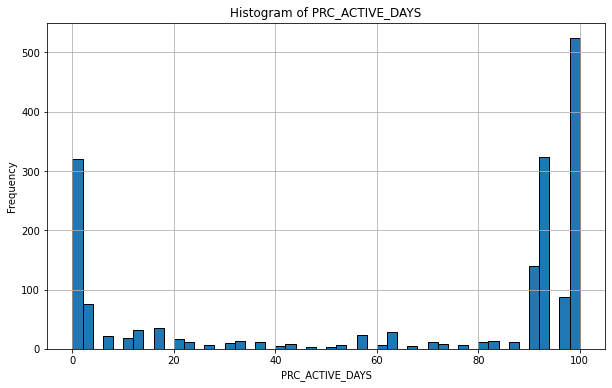

In [14]:
print(data["PRC_ACTIVE_DAYS"].describe())

plt.figure(figsize=(10, 6))  
plt.hist(data["PRC_ACTIVE_DAYS"], bins=50, edgecolor='black')  
plt.title('Histogram of PRC_ACTIVE_DAYS')  
plt.xlabel("PRC_ACTIVE_DAYS")  
plt.ylabel('Frequency')  
plt.grid(True)  
plt.show()